In [1]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Loading the dataset
df = pd.read_csv('Algerian_forest_fires_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
## Missing values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

Add new column with region

In [4]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1
df_new = df

In [5]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4   RH           245 non-null    object 
 5   Ws           245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [6]:
## Changing the data type of the religion column
df_new[['Region']] = df_new[['Region']].astype(int)

In [7]:
## Again checking the null values
df_new.isnull().sum()

day            1
month          2
year           2
Temperature    2
RH             2
Ws             2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [8]:
df_new = df_new.dropna().reset_index(drop=True)

In [9]:
df_new.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [11]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [12]:
## Now as the 122 row is empty drop it
df_new = df_new.drop(122).reset_index(drop=True)

In [13]:
df.iloc[123]

day            Sidi-Bel Abbes Region Dataset
month                                    NaN
year                                     NaN
Temperature                              NaN
RH                                       NaN
Ws                                       NaN
Rain                                     NaN
FFMC                                     NaN
DMC                                      NaN
DC                                       NaN
ISI                                      NaN
BUI                                      NaN
FWI                                      NaN
Classes                                  NaN
Region                                     1
Name: 123, dtype: object

In [14]:
## Now as the 123 row is empty drop it
df_new = df_new.drop(123).reset_index(drop=True)

In [15]:
df.iloc[[168]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [16]:
## Now as the 168 row is empty drop it
df_new = df_new.drop(168).reset_index(drop=True)

In [17]:
## Fixing the spaces in columns names
df_new.columns = df_new.columns.str.strip()
df_new.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

#### Changing the required columns as integer data type

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       247 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.1+ KB


In [23]:
columns_to_convert = ['month', 'day', 'year', 'Temperature', 'RH', 'Ws']
df_new[columns_to_convert] = df_new[columns_to_convert].astype(int)

#### Changing the other columnns to float data type

In [29]:
objects = [features for features in df_new.columns if df_new[features].dtypes=='O']

In [30]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [31]:
for i in objects:
    if i!='Classes':
        df_new[i]=df_new[i].astype(float)

In [33]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          241 non-null    int32  
 1   month        241 non-null    int32  
 2   year         241 non-null    int32  
 3   Temperature  241 non-null    int32  
 4   RH           241 non-null    int32  
 5   Ws           241 non-null    int32  
 6   Rain         241 non-null    float64
 7   FFMC         241 non-null    float64
 8   DMC          241 non-null    float64
 9   DC           241 non-null    float64
 10  ISI          241 non-null    float64
 11  BUI          241 non-null    float64
 12  FWI          241 non-null    float64
 13  Classes      241 non-null    object 
 14  Region       241 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 21.8+ KB


In [34]:
## saving the cleaned dataset
df_new.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

### Exploratory Data Analysis

In [35]:
## Drop day,month, and year
df_copy = df_new.drop(['day','month','year'],axis=1)

In [36]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [37]:
## Categories in classes
df_copy['Classes'].value_counts()

fire             130
not fire         100
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [38]:
## Encoding of the categories in classes
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [39]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [40]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
236,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
237,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
238,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
239,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
240,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [41]:
df_copy['Classes'].value_counts()

1    136
0    105
Name: Classes, dtype: int64

array([[<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'Ws'}>],
       [<AxesSubplot:title={'center':'Rain'}>,
        <AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>],
       [<AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'BUI'}>],
       [<AxesSubplot:title={'center':'FWI'}>,
        <AxesSubplot:title={'center':'Classes'}>,
        <AxesSubplot:title={'center':'Region'}>]], dtype=object)

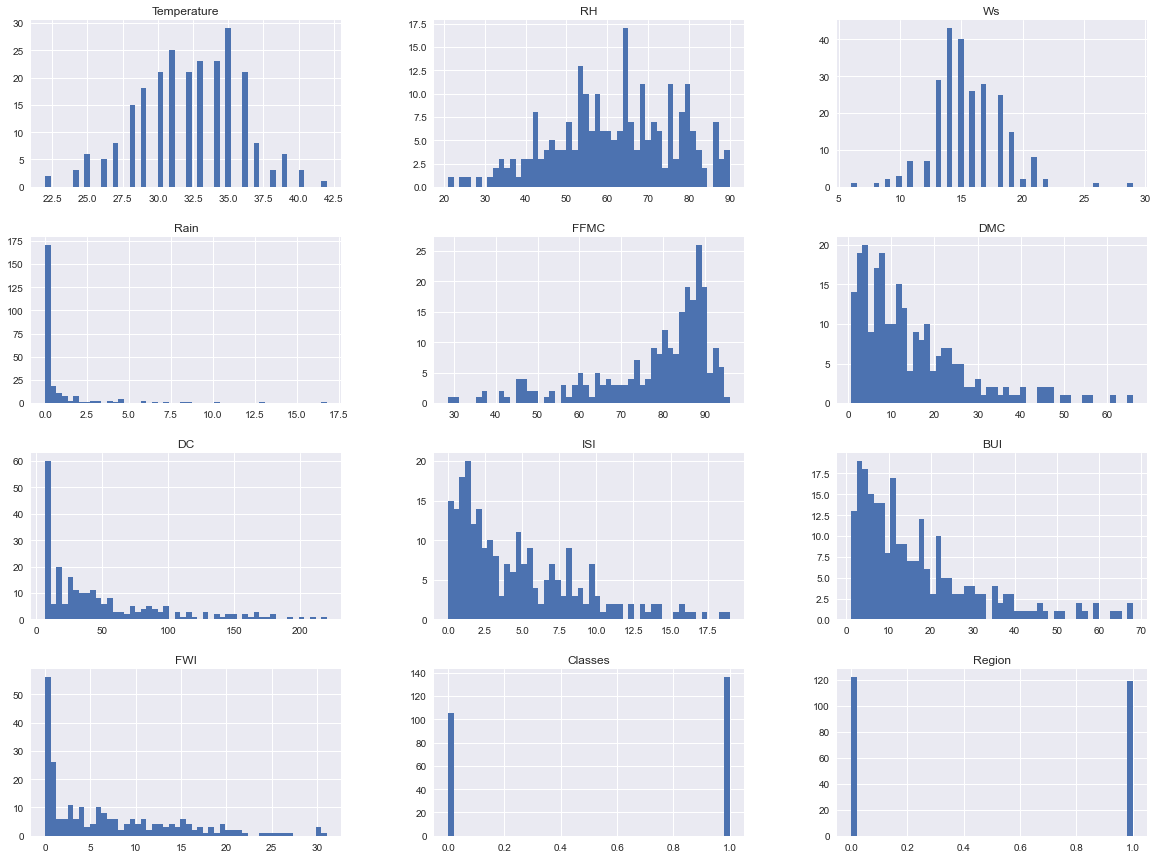

In [42]:
## Plot density plot for all features
plt.style.use('seaborn')
df_copy.hist(bins=50,figsize=(20,15))

In [43]:
## Percentage for pie Chart
percentage = df_copy['Classes'].value_counts(normalize=True)*100

In [44]:
percentage

1    56.431535
0    43.568465
Name: Classes, dtype: float64

Text(0.5, 1.0, 'Pie Chart of Classes')

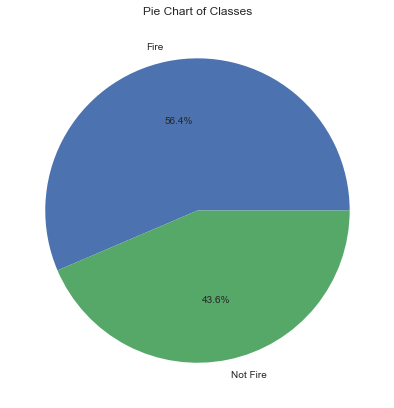

In [46]:
# plotting piechart
classlabels = ["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")

### Correlation

In [47]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.650672,-0.287917,-0.323989,0.676186,0.483757,0.374738,0.602602,0.457819,0.565181,0.514225,0.271385
RH,-0.650672,1.000000,0.247704,0.218512,-0.644035,-0.406626,-0.224664,-0.685753,-0.351577,-0.579774,-0.430088,-0.406856
Ws,-0.287917,0.247704,1.000000,0.179055,-0.174084,-0.005081,0.076002,0.004434,0.027442,0.028539,-0.075226,-0.179262
Rain,-0.323989,0.218512,0.179055,1.000000,-0.538758,-0.283476,-0.293974,-0.342780,-0.294778,-0.319832,-0.373859,-0.045620
FFMC,0.676186,-0.644035,-0.174084,-0.538758,1.000000,0.600460,0.504981,0.738340,0.588939,0.689146,0.767517,0.228017
DMC,0.483757,-0.406626,-0.005081,-0.283476,0.600460,1.000000,0.876584,0.678587,0.982286,0.875092,0.582234,0.193335
DC,0.374738,-0.224664,0.076002,-0.293974,0.504981,0.876584,1.000000,0.506719,0.942307,0.738922,0.509172,-0.076561
ISI,0.602602,-0.685753,0.004434,-0.342780,0.738340,0.678587,0.506719,1.000000,0.641992,0.922522,0.733489,0.266663
BUI,0.457819,-0.351577,0.027442,-0.294778,0.588939,0.982286,0.942307,0.641992,1.000000,0.857087,0.583625,0.090894
FWI,0.565181,-0.579774,0.028539,-0.319832,0.689146,0.875092,0.738922,0.922522,0.857087,1.000000,0.717254,0.199035


<AxesSubplot:>

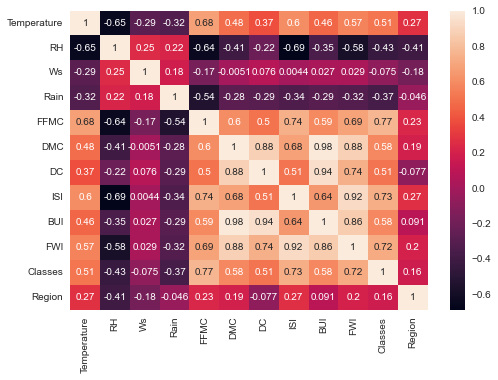

In [49]:
sns.heatmap(df_copy.corr(),annot=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15384\1504224248.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_new.corr(),annot=True)


<AxesSubplot:>

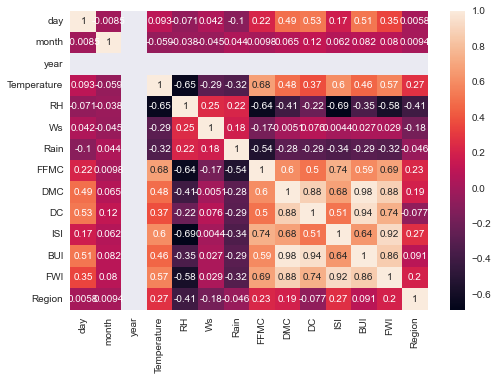

In [54]:
sns.heatmap(df_new.corr(),annot=True)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FWI'>

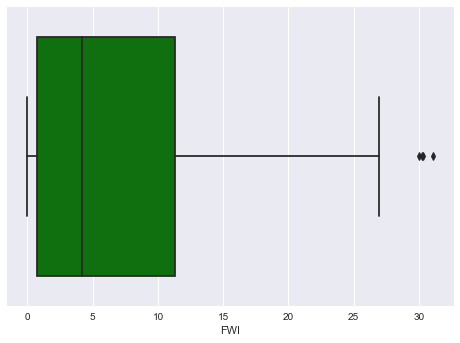

In [55]:
## Box Plots -- to check the outliers
sns.boxplot(df_new['FWI'],color='green')

In [56]:
df_new['Classes'] = np.where(df_new['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

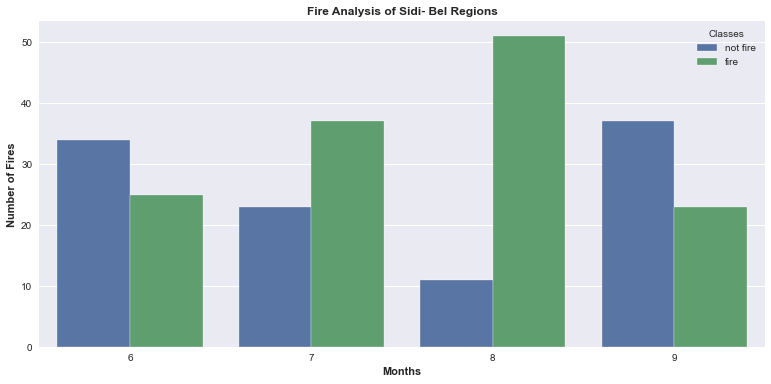

In [58]:
## Monthly Fire Analysis for Region==1
dftemp =df_new.loc[df_new['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df_new)
plt.ylabel('Number of Fires',weight = 'bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Brjaia Regions')

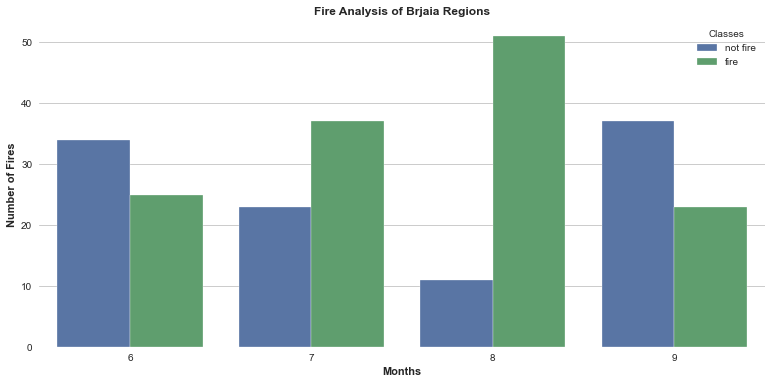

In [59]:
## Monthly Fire Analysis for Region==0
dftemp =df_new.loc[df_new['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df_new)
plt.ylabel('Number of Fires',weight = 'bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brjaia Regions",weight='bold')

Its observed that August and September had the most number of forest fires for both regions. and from the above plot of months, we can understand few things

Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August

Less Fires was on September